In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
data_path = '/Users/gio/Documents/VsCode/FICO_case_HTW2025'
data_size = '100'

## Read the Data

In [5]:
df_info = pd.read_csv(f'{data_path}/data{data_size}/shares{data_size}.csv')
df_info = df_info.T
df_info.columns = df_info.loc['Stock']
df_info = df_info.drop('Stock', axis=0)

df_price = pd.read_csv(f'{data_path}/data{data_size}/stockprices{data_size}.csv')
df_price = df_price.T
df_price.columns = df_price.loc['Stock']
df_price = df_price.drop('Stock', axis=0)
df_price = df_price.reset_index(drop=True)
df_price = df_price.astype(float)

df_return = np.log(df_price / df_price.shift(1)).dropna()

display(df_info.head())
display(df_price.head())
display(df_return.head())

Stock,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_91,Stock_92,Stock_93,Stock_94,Stock_95,Stock_96,Stock_97,Stock_98,Stock_99,Stock_100
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Return,0.1598,0.2018,0.0883,0.2048,0.0818,0.0676,0.1445,0.0265,0.0196,0.0774,...,0.1438,-0.015,0.1166,-0.0963,0.0792,0.0687,0.115,0.0552,0.077,0.0517
Sector,Healthcare,Technology,Consumer Goods,Finance,Finance,Energy,Healthcare,Healthcare,Real Estate,Technology,...,Energy,Industrials,Healthcare,Technology,Healthcare,Energy,Energy,Real Estate,Healthcare,Real Estate
ESG score,73.0,95.0,63.0,68.0,65.0,43.0,52.0,68.0,58.0,66.0,...,37.0,52.0,84.0,79.0,57.0,63.0,31.0,59.0,77.0,44.0


Stock,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_91,Stock_92,Stock_93,Stock_94,Stock_95,Stock_96,Stock_97,Stock_98,Stock_99,Stock_100
0,49.96,98.40,79.64,86.31,79.29,34.18,31.67,96.26,21.93,57.85,...,34.39,82.18,53.58,80.95,44.07,36.39,81.50,56.10,40.17,22.79
1,45.81,93.60,82.03,90.64,78.28,34.50,32.60,104.80,18.85,58.31,...,35.88,79.71,56.46,77.49,45.03,34.96,84.20,66.20,43.41,21.79
2,46.94,116.40,79.36,92.08,74.09,34.81,31.53,103.98,17.14,63.79,...,40.28,77.22,51.93,67.79,41.39,36.94,81.07,55.67,45.23,18.81
3,47.96,129.46,77.67,96.49,78.91,34.55,32.06,100.54,19.50,59.36,...,44.05,79.38,57.52,69.75,43.37,34.91,83.77,58.12,45.01,22.01
4,51.64,129.74,81.77,101.21,77.42,34.45,34.91,99.56,18.42,65.74,...,44.21,83.28,54.87,72.89,43.39,34.12,82.77,64.19,41.49,25.95


Stock,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_91,Stock_92,Stock_93,Stock_94,Stock_95,Stock_96,Stock_97,Stock_98,Stock_99,Stock_100
1,-0.086720,-0.050010,0.029569,0.048950,-0.012820,0.009319,0.028942,0.085001,-0.151343,0.007920,...,0.042414,-0.030517,0.052357,-0.043683,0.021550,-0.040089,0.032592,0.165545,0.077569,-0.044871
2,0.024368,0.218002,-0.033091,0.015762,-0.055012,0.008945,-0.033373,-0.007855,-0.095098,0.089823,...,0.115675,-0.031737,-0.083636,-0.133734,-0.084290,0.055090,-0.037882,-0.173239,0.041071,-0.147063
3,0.021497,0.106339,-0.021525,0.046782,0.063027,-0.007497,0.016670,-0.033643,0.129000,-0.071976,...,0.089470,0.027588,0.102236,0.028503,0.046729,-0.056522,0.032762,0.043068,-0.004876,0.157108
4,0.073929,0.002160,0.051441,0.047758,-0.019063,-0.002899,0.085164,-0.009795,-0.056977,0.102087,...,0.003626,0.047962,-0.047166,0.044034,0.000461,-0.022890,-0.012009,0.099338,-0.081432,0.164675
5,-0.044144,-0.035940,0.004271,0.055351,0.064280,0.032556,0.026849,0.032900,0.046150,-0.005185,...,-0.005216,0.071360,0.039137,0.030135,-0.023552,-0.015655,0.040721,0.065570,0.054410,0.087043


### Any Missing Value in prices?

In [7]:
if df_price.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print('There are NO missing values in the DataFrame.')

There are NO missing values in the DataFrame.


## Explore the Data

In [8]:
display(df_price.describe())
display(df_return.describe())

Stock,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_91,Stock_92,Stock_93,Stock_94,Stock_95,Stock_96,Stock_97,Stock_98,Stock_99,Stock_100
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,32.261260,7.119748,26.045132,23.700100,26.553060,59.365464,13.454680,10.909716,6.098564,17.766780,...,26.84158,7.436696,16.551864,6.035094,7.443016,8.053602,499.217492,7.977754,52.787676,9.961472
std,86.163402,20.575484,18.349828,25.355489,25.058973,54.822722,19.689297,17.040600,9.609745,48.119934,...,27.07658,12.050397,22.212527,17.536908,8.774565,8.158333,541.109657,22.198512,85.707356,16.508524
min,1.000000,1.000000,2.200000,1.530000,1.270000,3.290000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.060000,81.070000,1.000000,1.000000,1.000000
25%,1.480000,1.220000,13.880000,7.640000,7.800000,10.890000,1.510000,2.980000,1.470000,1.580000,...,3.47000,1.150000,3.920000,1.300000,1.240000,3.270000,215.735000,1.200000,1.380000,1.320000
50%,2.520000,1.780000,20.910000,14.665000,15.220000,48.665000,3.230000,5.710000,2.160000,3.410000,...,20.97000,1.520000,7.955000,2.190000,2.440000,5.640000,287.940000,1.760000,2.320000,2.595000
75%,18.175000,3.702500,35.252500,30.312500,40.865000,79.615000,17.422500,12.440000,5.030000,7.170000,...,39.58500,9.730000,17.352500,4.302500,11.925000,8.590000,460.497500,4.400000,81.022500,10.260000
max,665.370000,229.420000,105.370000,169.680000,135.260000,246.200000,104.730000,121.160000,71.760000,419.760000,...,156.08000,92.530000,131.110000,170.220000,45.030000,52.460000,2924.030000,211.790000,593.800000,123.740000


Stock,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_91,Stock_92,Stock_93,Stock_94,Stock_95,Stock_96,Stock_97,Stock_98,Stock_99,Stock_100
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,-0.000707,-0.000903,-0.000152,-0.000686,-0.000827,-0.000454,-0.000634,-0.000362,-0.000618,-0.000474,...,-0.000648,-0.000882,-0.000366,-0.000836,-0.000711,-0.000387,0.000345,-0.000697,-0.000621,-0.000625
std,0.073487,0.146329,0.036224,0.073204,0.043127,0.030826,0.070087,0.035875,0.094939,0.087790,...,0.044735,0.041204,0.061322,0.095130,0.051473,0.031296,0.039593,0.118405,0.050820,0.117076
min,-0.303428,-0.871925,-0.157186,-0.327029,-0.160551,-0.112107,-0.351281,-0.135438,-0.441372,-0.347912,...,-0.183495,-0.164680,-0.219233,-0.462922,-0.214410,-0.111719,-0.150232,-0.586657,-0.195425,-0.546779
25%,-0.047919,-0.086178,-0.024528,-0.048326,-0.029781,-0.021503,-0.046156,-0.024712,-0.061796,-0.053915,...,-0.030563,-0.027481,-0.040822,-0.061721,-0.033902,-0.021740,-0.025668,-0.075342,-0.032790,-0.072314
50%,0.000000,0.000000,0.001107,0.002130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001526,0.000000,0.000000,0.000000,0.001025,0.000000,0.000000,0.000000
75%,0.050010,0.098626,0.024925,0.050713,0.028747,0.021046,0.046821,0.024237,0.064614,0.058269,...,0.030384,0.025734,0.040094,0.064448,0.033902,0.021230,0.027376,0.079119,0.033475,0.077292
max,0.226930,0.430404,0.118478,0.280532,0.152366,0.107510,0.266480,0.113835,0.285506,0.250186,...,0.131216,0.143101,0.223144,0.307485,0.154991,0.119440,0.136943,0.375789,0.194879,0.369055


### Calculate Key Financial Statistics

Here we compute several key statistical measures for the stock returns. We calculate daily and annualized mean returns, standard deviation (volatility), skewness, and kurtosis. These statistics are essential for understanding the risk and return characteristics of each stock.

In [9]:
# Calculate the daily mean return for each stock (mu_daily)
mu_daily = df_return.mean(axis=0)
# Calculate the daily standard deviation (volatility) for each stock (sig_daily)
# ddof=1 is used for sample standard deviation
sig_daily = df_return.std(axis=0, ddof=1)

# Annualize the daily mean return by multiplying by 252 (the approximate number of trading days in a year)
mu_ann = mu_daily * 252.0
# Annualize the daily standard deviation by multiplying by the square root of 252
sig_ann = sig_daily * np.sqrt(252.0)

# Calculate the skewness of the daily returns. Skewness measures the asymmetry of the return distribution.
skew_daily = df_return.skew(axis=0)
# Calculate the kurtosis of the daily returns. Kurtosis measures the "tailedness" of the distribution.
kurt_daily = df_return.kurtosis(axis=0)

# The Jarque-Bera test is used to check if the data has a normal distribution.
# We fill missing values with 0 to perform the test, as some stocks might have no returns.
jb_stat, jb_p = stats.jarque_bera(df_return.fillna(0))

# Create a new DataFrame to summarize all the calculated statistics along with the ESG score and Sector information
summary = pd.DataFrame({
    "ESG": df_info.loc['ESG score'],  # Fetch the ESG score from the df_info DataFrame
    "Sector": df_info.loc['Sector'],    # Fetch the sector information
    "mu_daily": mu_daily,
    "sigma_daily": sig_daily,
    "mu_ann": mu_ann,
    "sigma_ann": sig_ann,
    "skew": skew_daily,
    "kurtosis": kurt_daily,
})

# Display the summary DataFrame
display(summary)
# Display the summary DataFrame sorted in descending order by ESG score
# This allows for a quick view of stocks with the highest ESG ratings
display(summary.sort_values(by="ESG", ascending=False))

,ESG,Sector,mu_daily,sigma_daily,mu_ann,sigma_ann,skew,kurtosis
Stock,,,,,,,,
Stock_1,73.0,Healthcare,-0.000707,0.073487,-0.178088,1.166573,-0.232600,0.190205
Stock_2,95.0,Technology,-0.000903,0.146329,-0.227454,2.322899,-0.441232,0.742628
Stock_3,63.0,Consumer Goods,-0.000152,0.036224,-0.038427,0.575037,-0.155764,0.073719
Stock_4,68.0,Finance,-0.000686,0.073204,-0.172822,1.162080,-0.242108,0.209455
Stock_5,65.0,Finance,-0.000827,0.043127,-0.208400,0.684622,-0.101885,-0.036886
...,...,...,...,...,...,...,...,...
Stock_96,63.0,Energy,-0.000387,0.031296,-0.097501,0.496815,-0.080835,-0.066542
Stock_97,31.0,Energy,0.000345,0.039593,0.087039,0.628512,-0.097040,-0.068121
Stock_98,59.0,Real Estate,-0.000697,0.118405,-0.175670,1.879614,-0.370345,0.419212


,ESG,Sector,mu_daily,sigma_daily,mu_ann,sigma_ann,skew,kurtosis
Stock,,,,,,,,
Stock_41,165.0,Consumer Goods,-0.000627,0.036100,-0.158034,0.573074,-0.102505,-0.088800
Stock_36,95.0,Technology,-0.000356,0.137318,-0.089640,2.179857,-0.456451,0.668081
Stock_2,95.0,Technology,-0.000903,0.146329,-0.227454,2.322899,-0.441232,0.742628
Stock_71,93.0,Technology,-0.000825,0.133728,-0.207867,2.122869,-0.427150,0.477498
Stock_57,90.0,Utilities,0.000104,0.042190,0.026252,0.669738,-0.124329,0.039967
...,...,...,...,...,...,...,...,...
Stock_64,37.0,Industrials,-0.000199,0.072045,-0.050129,1.143685,-0.281806,0.283440
Stock_61,36.0,Energy,-0.000599,0.045909,-0.151034,0.728777,-0.138338,0.014629
Stock_97,31.0,Energy,0.000345,0.039593,0.087039,0.628512,-0.097040,-0.068121


### Visualize Data Distribution

Visualizing the data distribution is a crucial step in exploratory data analysis (EDA). Here, we create a histogram to understand the frequency of daily returns across the dataset. This helps us identify the shape of the distribution and spot any potential outliers.

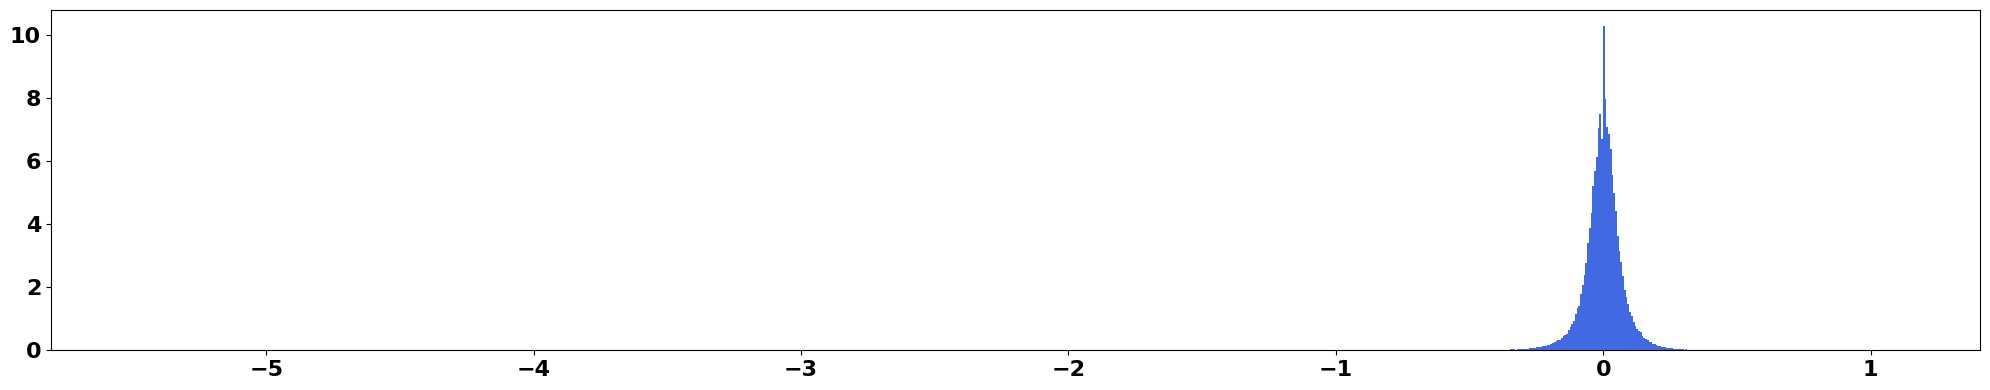

In [10]:
# Set the figure size for better visibility
plt.figure(figsize=(20, 4))
# Create a histogram of the daily returns
# .values.ravel() flattens the DataFrame into a single array for the histogram
# bins=1000 sets a high number of bins for a detailed view
# density=True normalizes the histogram so the total area equals 1
plt.hist(df_return.values.ravel(), bins=1000, density=True, color='royalblue')
# Customize x-axis ticks with bold font and larger size for readability
plt.xticks(fontweight='bold', fontsize=16)
# Customize y-axis ticks with bold font and larger size
plt.yticks(fontweight='bold', fontsize=16)
# Adjust plot to ensure all elements fit without overlapping
plt.tight_layout()
# Display the plot
plt.show()

### Analyze Correlation and Covariance

Understanding the relationships between different stocks is crucial for portfolio management. The correlation matrix shows how the price movements of stocks relate to each other, while the covariance matrix provides a measure of their joint variability. A heatmap is an excellent way to visualize these relationships.

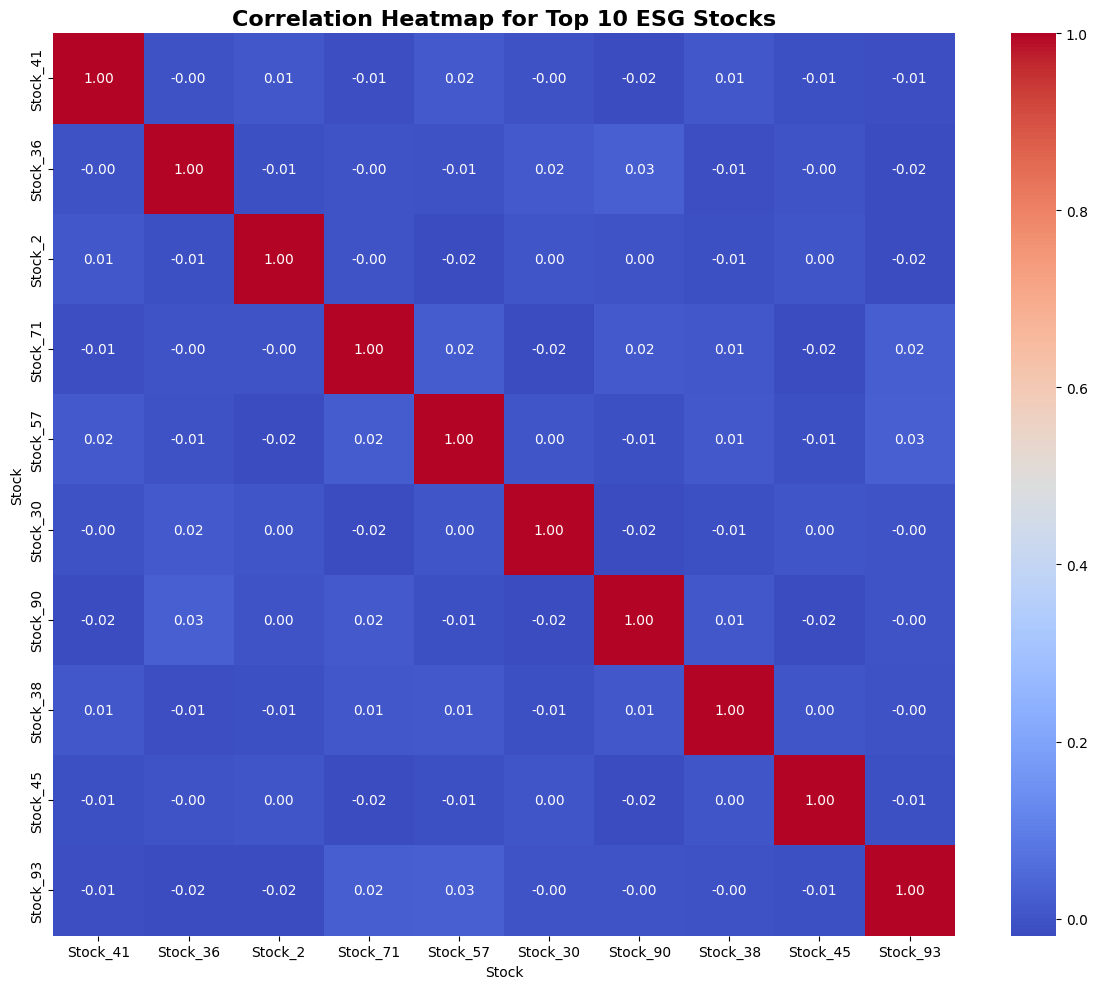

In [11]:
# Select the top 10 stocks with the highest ESG scores
top_esg_stocks = summary.sort_values(by="ESG", ascending=False).head(10).index
# Filter the returns DataFrame to include only these stocks
df_top_esg_return = df_return[top_esg_stocks]
# Calculate the correlation matrix for the selected stocks
df_top_esg_corr = df_top_esg_return.corr()

# Create a figure with an appropriate size
plt.figure(figsize=(12, 10))

# Generate the heatmap for the top ESG stocks
sns.heatmap(df_top_esg_corr, cmap='coolwarm', annot=True, fmt='.2f',
            xticklabels=df_top_esg_corr.columns, yticklabels=df_top_esg_corr.columns)

# Set the title of the plot
plt.title('Correlation Heatmap for Top 10 ESG Stocks', fontsize=16, fontweight='bold')
# Adjust plot layout
plt.tight_layout()
# Display the plot
plt.show()

### Analyze Sector-Level Correlation

To get a clearer, more simplified view of market relationships, we can analyze the correlation between different sectors. This approach reduces the complexity from 100 individual stocks to a much more manageable number of sectors, providing a high-level overview of how different parts of the economy move in relation to each other.

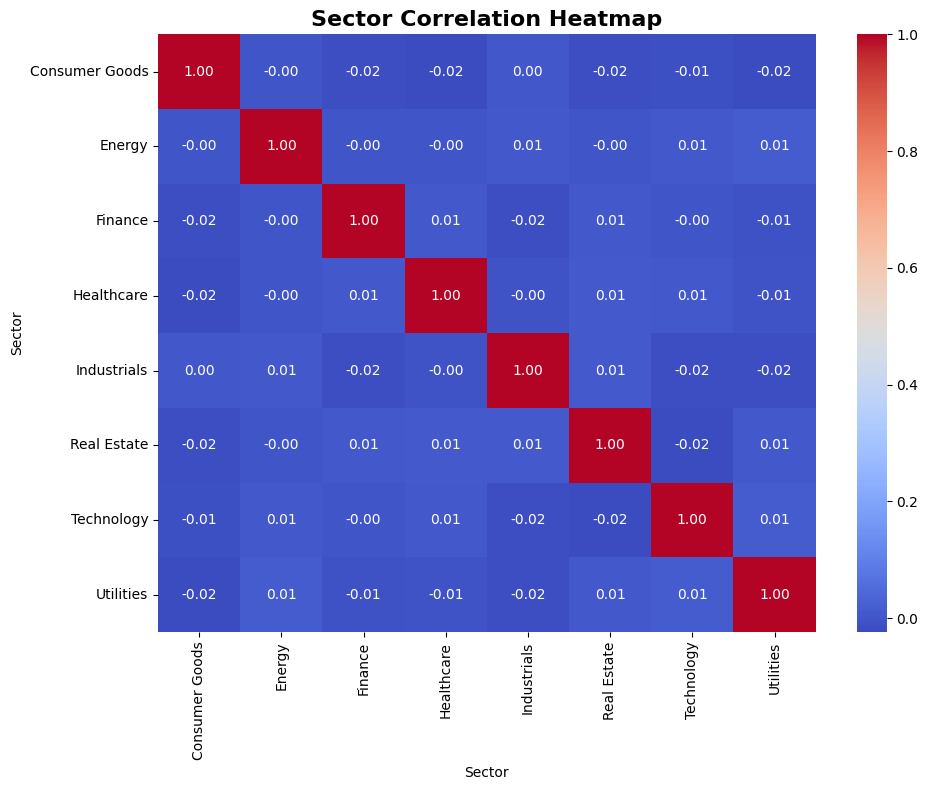

In [12]:
# Merge the returns DataFrame with the sector information from df_info
# This step is necessary to group stock returns by their respective sectors
df_merged = df_return.T.merge(df_info.loc['Sector'].to_frame(), left_index=True, right_index=True)

# Calculate the mean return for each sector
# We group the data by 'Sector' and compute the average return for all stocks within that sector
df_sector_return = df_merged.groupby('Sector').mean().T

# Calculate the correlation matrix between the average sector returns
df_sector_corr = df_sector_return.corr()

# Create a figure for the heatmap with a suitable size for readability
plt.figure(figsize=(10, 8))

# Generate the heatmap using Seaborn
# df_sector_corr: The sector correlation data
# cmap='coolwarm': A diverging colormap is ideal for visualizing correlations
# annot=True: Displays the correlation values on the heatmap
# fmt='.2f': Formats the annotations to two decimal places
# xticklabels=df_sector_corr.columns, yticklabels=df_sector_corr.columns: Uses sector names as labels
sns.heatmap(df_sector_corr,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            xticklabels=df_sector_corr.columns,
            yticklabels=df_sector_corr.columns)

# Set the title of the plot
plt.title('Sector Correlation Heatmap', fontsize=16, fontweight='bold')
# Adjust plot layout to ensure everything fits without being cut off
plt.tight_layout()
# Display the plot
plt.show()

In [13]:
df_sector = df_info.iloc[1, :].unique().tolist()
(df_info.T).groupby(['Sector']).mean()

,Unnamed: 0,Return,ESG score
Sector,,,
Consumer Goods,48.25,0.079725,68.083333
Energy,61.090909,0.123891,49.727273
Finance,44.611111,0.108467,62.0
Healthcare,43.764706,0.112982,70.294118
Industrials,59.714286,0.058033,47.571429
Real Estate,57.538462,0.081431,54.230769
Technology,36.4,0.13032,82.7
Utilities,51.833333,0.078725,77.0


## Visualize Sector Performance

To get a clearer picture of which sectors are performing best, we can visualize the average annual return and volatility. This code aggregates the individual stock data by sector and then creates two bar charts: one for the average annualized return (mu_ann) and another for the average annualized standard deviation (sigma_ann). This allows for easy comparison of performance across different sectors.

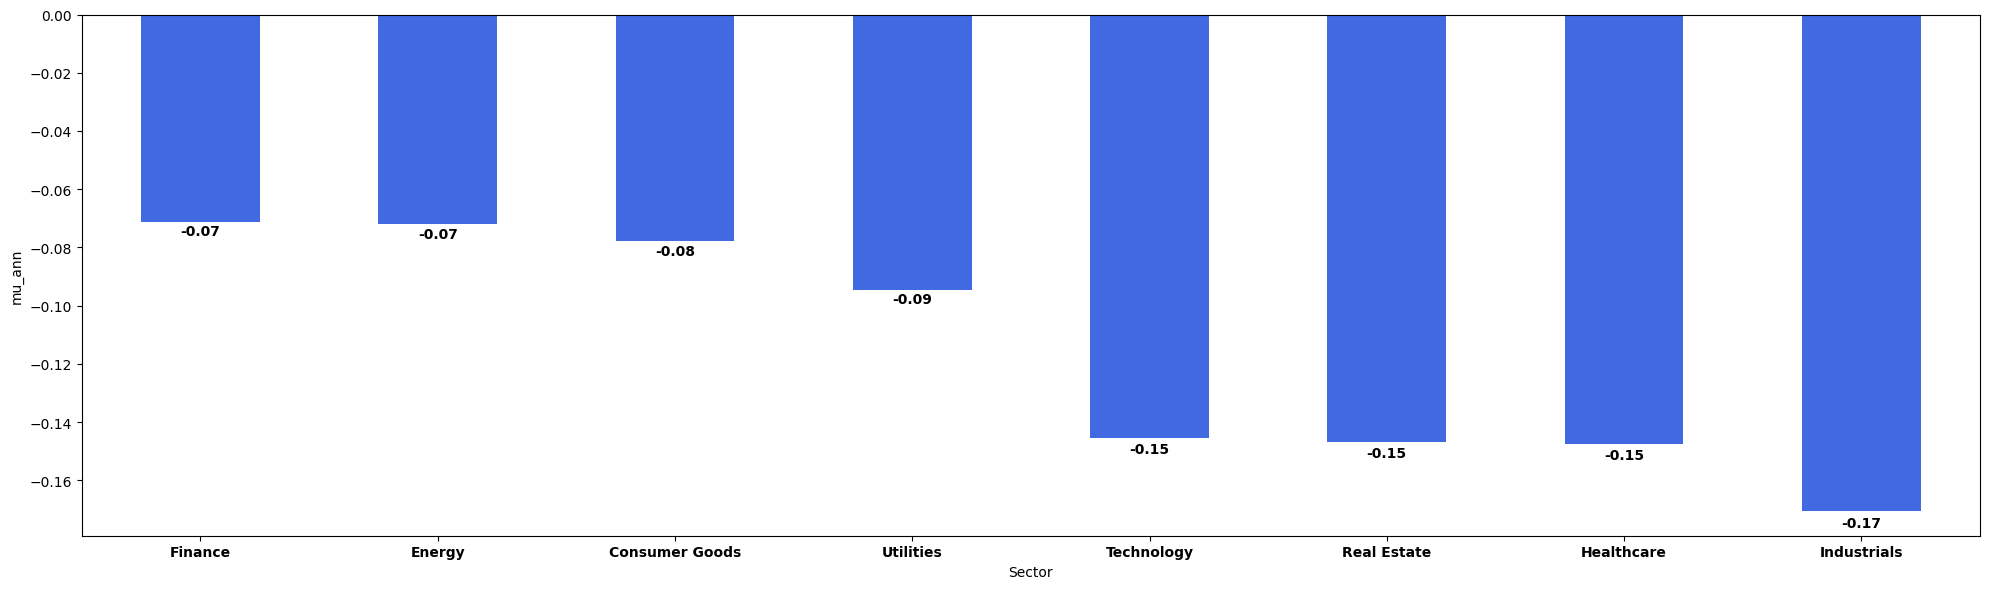

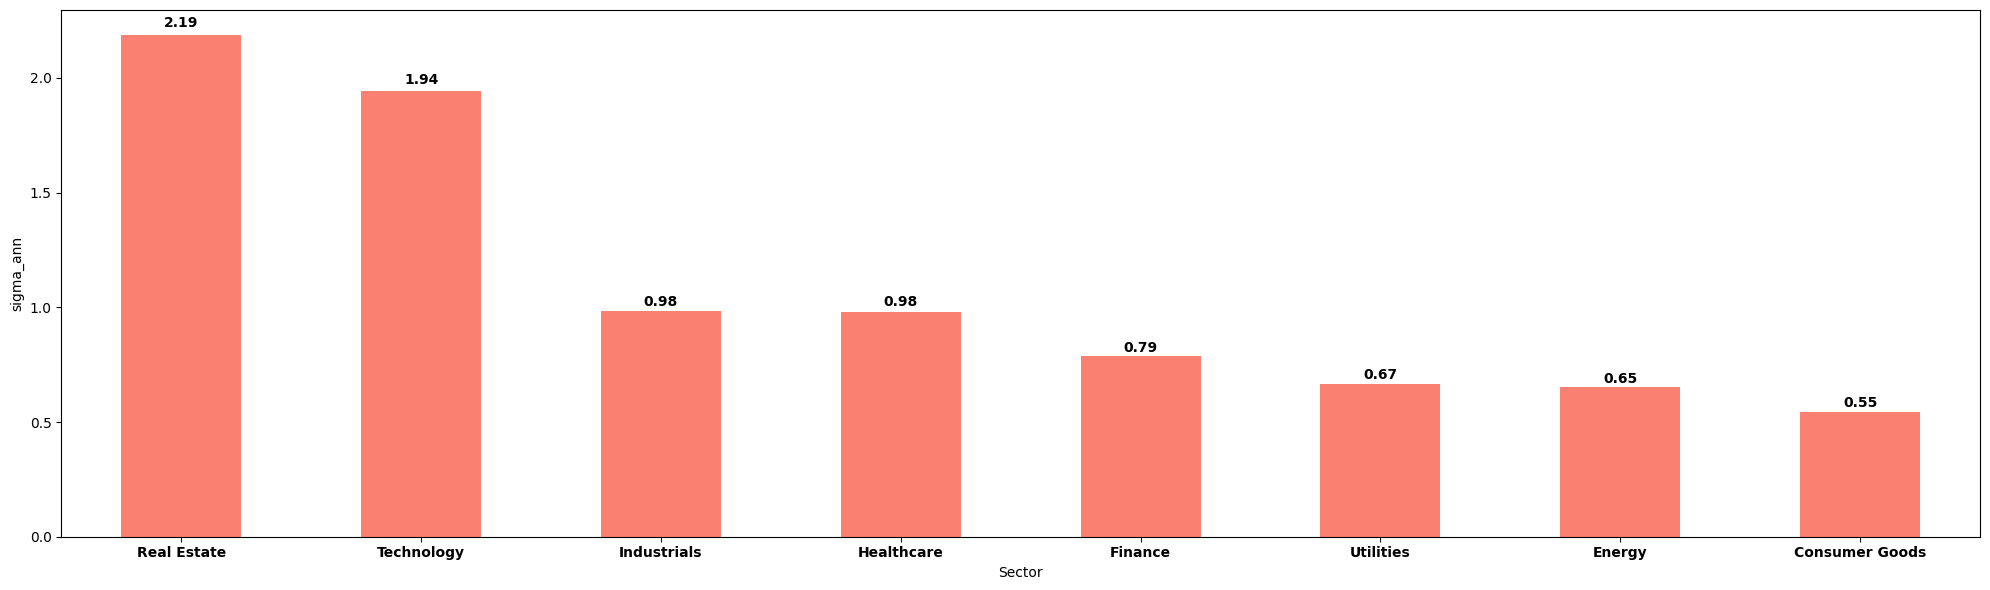

In [14]:
# Create a summary DataFrame that combines the ESG score and Sector with the calculated financial statistics
summary = pd.DataFrame({
    "ESG": df_info.loc['ESG score'],
    "Sector": df_info.loc['Sector'],
    "mu_daily": mu_daily,
    "sigma_daily": sig_daily,
    "mu_ann": mu_ann,
    "sigma_ann": sig_ann,
    "skew": skew_daily,
    "kurtosis": kurt_daily,
})

# Group the summary data by "Sector" and calculate the mean of the annual returns, then sort in descending order
g_mu = summary.groupby("Sector")["mu_ann"].mean().sort_values(ascending=False)
# Group the data by "Sector" and calculate the mean of the annual standard deviation (volatility), then sort
g_sig = summary.groupby("Sector")["sigma_ann"].mean().sort_values(ascending=False)


# --------------------------------------------------------------------------------
# Plot 1: Annualized Mean Returns by Sector (mu_ann)
# --------------------------------------------------------------------------------

# Create a figure for the bar chart with a suitable size
plt.figure(figsize=(20, 6))
# Plot the grouped mean returns as a bar chart
ax = g_mu.plot(kind="bar", color="royalblue")
# Set the label for the y-axis
plt.ylabel("mu_ann")

# Add text annotations on top of each bar to show the exact value
for p in ax.patches:
    value = p.get_height()
    if value >= 0:
        # Place text at the top of the bar for positive values
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold')
    else:
        # Place text at the bottom of the bar for negative values
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="top", fontsize=10, fontweight='bold')

# Customize x-axis labels to avoid overlap and improve readability
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
# Adjust the plot layout to ensure all elements are visible
plt.tight_layout()
# Display the plot
plt.show()


# --------------------------------------------------------------------------------
# Plot 2: Annualized Standard Deviation by Sector (sigma_ann)
# --------------------------------------------------------------------------------

# Create a second figure for the standard deviation bar chart
plt.figure(figsize=(20, 6))
# Plot the grouped standard deviation values as a bar chart
ax = g_sig.plot(kind="bar", color="salmon")
# Set the label for the y-axis
plt.ylabel("sigma_ann")

# Add text annotations to the bars, similar to the previous plot
for p in ax.patches:
    value = p.get_height()
    if value >= 0:
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold')
    else:
        ax.text(p.get_x() + p.get_width()/2, value*1.01, f"{value:.2f}", ha="center", va="top", fontsize=10, fontweight='bold')

# Customize x-axis labels
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
# Adjust the plot layout
plt.tight_layout()
# Display the plot
plt.show()